<a href="https://colab.research.google.com/github/rashiq123/Knn/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/salary.csv")
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [9]:
data["income"].replace({"<=50K":1,">50K" :0},inplace = True)
data

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,1
1,82,9,0,18,1
2,66,10,0,40,1
3,54,4,0,40,1
4,41,10,0,40,1
...,...,...,...,...,...
32556,22,10,0,40,1
32557,27,12,0,38,1
32558,40,9,0,40,0
32559,58,9,0,40,1


In [10]:
X = data.iloc[: , :-1].values
Y = data.iloc[:,-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.25 , random_state=0)
X_train

array([[  55,    3,    0,   40],
       [  42,    9,    0,   40],
       [  42,    9,    0,   40],
       ...,
       [  26,    8,    0,   51],
       [  44,   14,    0,   40],
       [  39,    9, 7298,   40]])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

Text(0, 0.5, 'Mean Error')

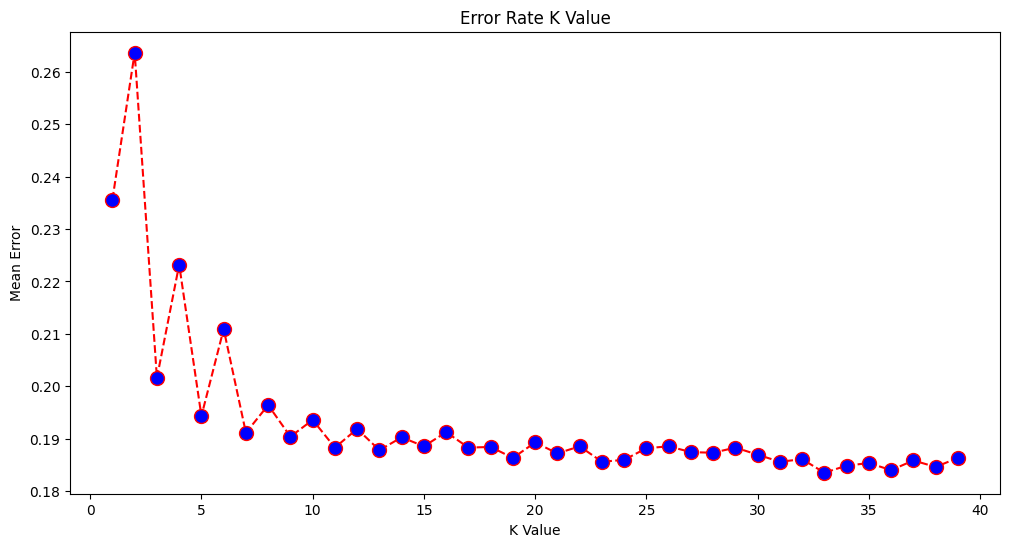

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train , y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color = "red" , linestyle = 'dashed' , marker='o' , markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
model = KNeighborsClassifier(n_neighbors=13 , metric = 'minkowski',p = 2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test , y_pred)
print('cm')
print(cm)
print('as')
print(accuracy_score(y_test,y_pred)*100)


cm
[[ 834 1114]
 [ 415 5778]]
as
81.21852352290874


In [27]:
age = int(input("age : "))
edu = int(input("education : "))
cg = int(input("capital gain : "))
wh = int(input("hours per week : "))
newemp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))
print(result)

if result == 1:
  print(" >=50k")
else:
  print("<50k")

age : 55
education : 15
capital gain : 0
hours per week : 40
[0]
<50k
